# Library import

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
from yellowbrick.cluster import KElbowVisualizer

In [2]:
data = pd.read_csv("open_food_products_clean.csv")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   838 non-null    int64  
 1   code                         838 non-null    int64  
 2   product_name                 682 non-null    object 
 3   quantity                     660 non-null    object 
 4   packaging                    253 non-null    object 
 5   brands                       658 non-null    object 
 6   categories_en                284 non-null    object 
 7   origins                      144 non-null    object 
 8   purchase_places              270 non-null    object 
 9   stores                       98 non-null     object 
 10  countries_en                 838 non-null    object 
 11  allergens                    9 non-null      object 
 12  additives_n                  237 non-null    float64
 13  energy_100g         

In [12]:
data_no_object = data.drop(["Unnamed: 0", "code", "product_name", "quantity", "packaging", "brands", "categories_en", "origins", "purchase_places", "stores", "countries_en", "allergens"],
axis = 1, inplace = False)

In [13]:
data_no_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   additives_n                  237 non-null    float64
 1   energy_100g                  231 non-null    float64
 2   energy-from-fat_100g         2 non-null      float64
 3   fat_100g                     227 non-null    float64
 4   saturated-fat_100g           207 non-null    float64
 5   carbohydrates_100g           231 non-null    float64
 6   sugars_100g                  156 non-null    float64
 7   sodium_100g                  226 non-null    float64
 8   vitamin-a_100g               46 non-null     float64
 9   vitamin-d_100g               36 non-null     float64
 10  vitamin-e_100g               13 non-null     float64
 11  vitamin-k_100g               2 non-null      float64
 12  vitamin-c_100g               19 non-null     float64
 13  vitamin-b1_100g     

In [20]:
data_no_object = data_no_object.fillna(0)
data_no_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   additives_n                  838 non-null    float64
 1   energy_100g                  838 non-null    float64
 2   energy-from-fat_100g         838 non-null    float64
 3   fat_100g                     838 non-null    float64
 4   saturated-fat_100g           838 non-null    float64
 5   carbohydrates_100g           838 non-null    float64
 6   sugars_100g                  838 non-null    float64
 7   sodium_100g                  838 non-null    float64
 8   vitamin-a_100g               838 non-null    float64
 9   vitamin-d_100g               838 non-null    float64
 10  vitamin-e_100g               838 non-null    float64
 11  vitamin-k_100g               838 non-null    float64
 12  vitamin-c_100g               838 non-null    float64
 13  vitamin-b1_100g     

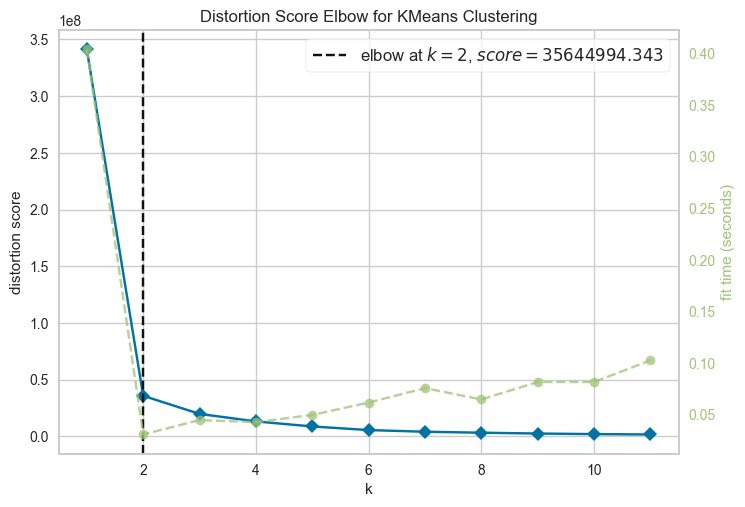

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
model = KMeans()
visualizer = KElbowVisualizer(model, k = (1,12)).fit(data_no_object)
visualizer.show()

In [38]:
scaler = StandardScaler()
cluster = KMeans(n_clusters = 3)
pipeline = make_pipeline(scaler, cluster)
pipeline.fit(data_no_object)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [28]:
labels = pipeline.predict(data_no_object)

In [29]:
data_no_object["cluster"] = labels
data_no_object.head()

,additives_n,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,sodium_100g,vitamin-a_100g,vitamin-d_100g,...,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4.0,173.0,0.0,0.0,0.0,10.7,0.0,1.63,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [30]:
data_no_object.cluster.value_counts()

0    832
2      5
1      1
Name: cluster, dtype: int64

In [32]:
scaler.fit(data_no_object)
StandardScaler(copy = True, with_mean = True, with_std = True)
data_norm = scaler.transform(data_no_object)

In [33]:
data_no_object_norm = pd.DataFrame(data_norm)
data_no_object_norm

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.303728,-0.446061,-0.04414,-0.315034,-0.255334,-0.424169,-0.245878,-0.133932,-0.037543,-0.035884,...,-0.085944,-0.090856,-0.090307,-0.081922,-0.052508,0.0,0.0,0.0,0.0,-0.083207
1,-0.303728,-0.446061,-0.04414,-0.315034,-0.255334,-0.424169,-0.245878,-0.133932,-0.037543,-0.035884,...,-0.085944,-0.090856,-0.090307,-0.081922,-0.052508,0.0,0.0,0.0,0.0,-0.083207
2,-0.303728,-0.446061,-0.04414,-0.315034,-0.255334,-0.424169,-0.245878,-0.133932,-0.037543,-0.035884,...,-0.085944,-0.090856,-0.090307,-0.081922,-0.052508,0.0,0.0,0.0,0.0,-0.083207
3,3.466994,-0.174671,-0.04414,-0.315034,-0.255334,0.074667,-0.245878,0.932055,-0.037543,-0.035884,...,-0.085944,-0.090856,-0.090307,-0.081922,-0.052508,0.0,0.0,0.0,0.0,-0.083207
4,-0.303728,-0.446061,-0.04414,-0.315034,-0.255334,-0.424169,-0.245878,-0.133932,-0.037543,-0.035884,...,-0.085944,-0.090856,-0.090307,-0.081922,-0.052508,0.0,0.0,0.0,0.0,-0.083207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,-0.303728,0.233199,-0.04414,0.052804,-0.077966,0.391684,1.495747,20.924216,-0.037543,-0.035884,...,-0.085944,-0.090856,-0.090307,-0.081922,-0.052508,0.0,0.0,0.0,0.0,-0.083207
834,-0.303728,-0.446061,-0.04414,-0.315034,-0.255334,-0.424169,-0.245878,-0.133932,-0.037543,-0.035884,...,-0.085944,-0.090856,-0.090307,-0.081922,-0.052508,0.0,0.0,0.0,0.0,-0.083207
835,-0.303728,-0.446061,-0.04414,-0.315034,-0.255334,-0.424169,-0.245878,-0.133932,-0.037543,-0.035884,...,-0.085944,-0.090856,-0.090307,-0.081922,-0.052508,0.0,0.0,0.0,0.0,-0.083207
836,0.638953,2.507855,-0.04414,1.553978,0.809298,2.623861,0.672705,0.376172,-0.037543,-0.035884,...,-0.085944,-0.090856,-0.090307,-0.081922,-0.052508,0.0,0.0,0.0,0.0,-0.083207


In [34]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(data_no_object_norm)
pca_data_df = pd.DataFrame(data = pca_data, columns = ["componente_1", "componente_2"])
pca_data_labeled = pd.concat([pca_data_df, data_no_object[["cluster"]]], axis = 1)
pca_data_labeled

,componente_1,componente_2,cluster
0,-0.466176,0.059017,0
1,-0.466176,0.059017,0
2,-0.466176,0.059017,0
3,-0.064597,0.103933,0
4,-0.466176,0.059017,0
...,...,...,...
833,0.293170,-0.319326,0
834,-0.466176,0.059017,0
835,-0.466176,0.059017,0
836,0.988680,-0.425078,0


In [43]:
colors = ['#FF7E00', '#8917A0', '#FF0000']

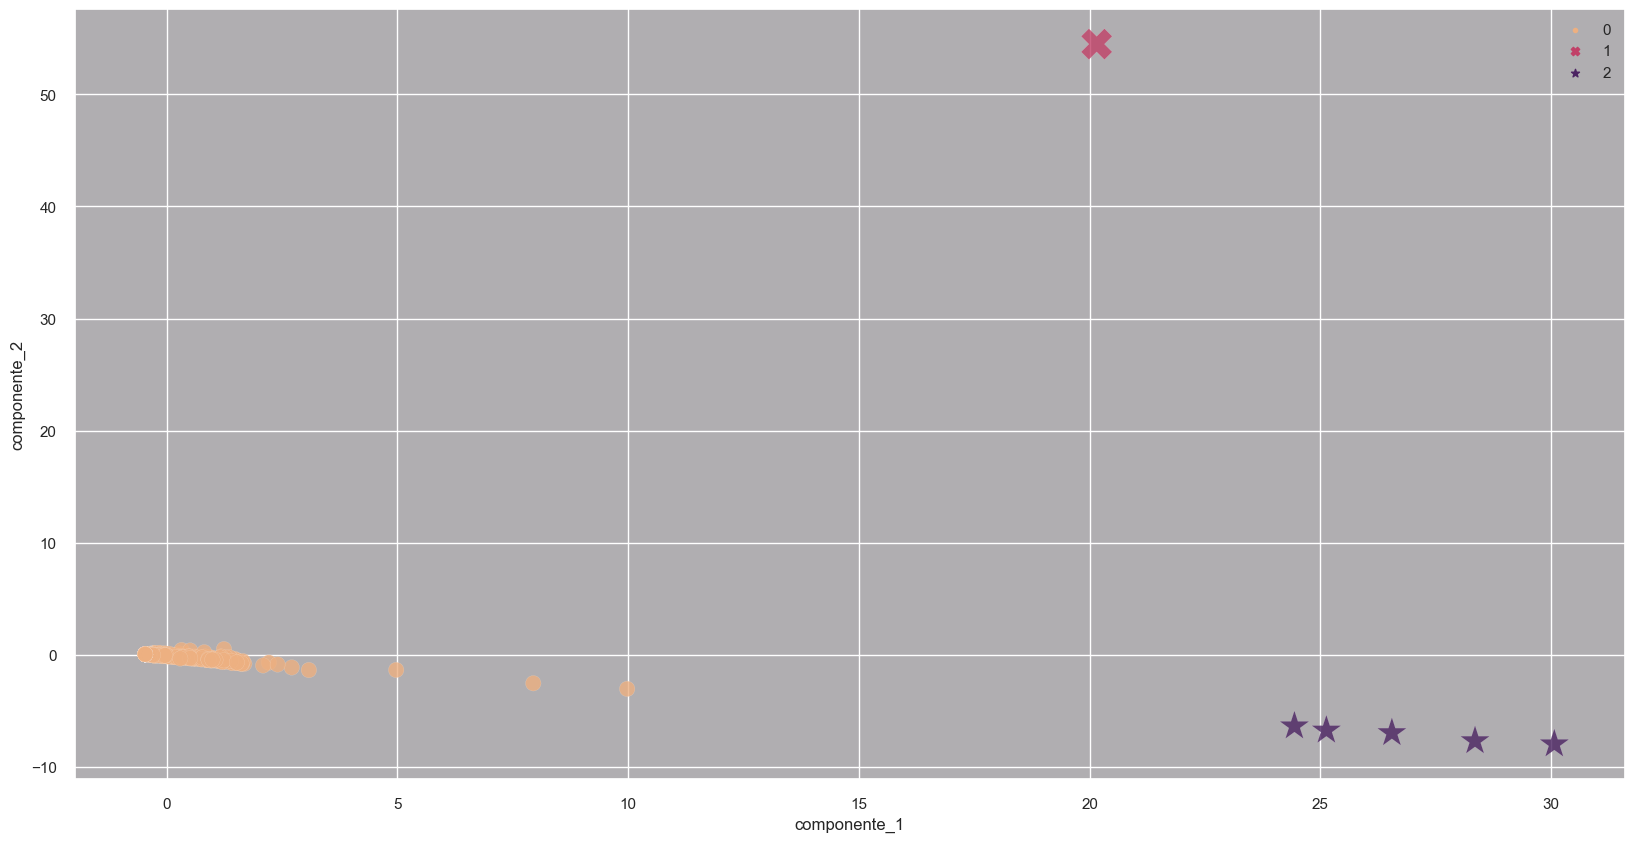

In [45]:
fig = plt.figure(figsize = (20,10))
markers = {0: ".", 1: "X", 2: "*"}

#define seaborn background colors
sns.set(rc={'axes.facecolor':'#B0AEB1', 'figure.facecolor':'#FFFFFF'})

sns.scatterplot(data = pca_data_labeled, x = "componente_1", y = "componente_2", hue = "cluster",
    alpha = 0.8, s = 500, style = "cluster", palette = "flare", markers = markers, linewidth = 0.09)

#plt.scatter(cluster.cluster_centers_[:,0], cluster.cluster_centers_[:,1], 
#            marker="^", c=colors, s=70, label="centroids")
plt.legend()
plt.show()

In [46]:
data["cluster"] = labels
data.head()

,Unnamed: 0,code,product_name,quantity,packaging,brands,categories_en,origins,purchase_places,stores,...,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,cluster
0,660,5329003107,Macarroni and cheese dinner,NaN,NaN,Best value,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,7444,11210115606,Tabasco Original,60ml,NaN,McIlheni Company,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,9404,11225423048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,10261,11848243108,Salsa picante sabor chamoy Mr. Chiles,500 ml,plástico,La Anita,"Groceries,Sauces,Hot sauces,es:Chamoy",NaN,México,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,13091,16000272033,honey nut cheerios,374g,NaN,nestle,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [47]:
data.to_csv("open_food_products_labeled.csv")